In [146]:
from collections import Counter
from datetime import datetime

import requests

In [169]:
API_KEY = ''
BASE_URL = 'https://api.case.law/v1/'
CASES_URL = 'https://api.case.law/v1/cases/'

In [150]:
# Authenticated session
with requests.Session() as sess:
    sess.headers['Authorization'] = 'Token {}'.format(API_KEY)
    # Retreive all API endpoints
    base_resp = sess.get(BASE_URL)
    # Example of single case
    case_resp = sess.get('https://api.case.law/v1/cases/3654649/', params={'full_case':'true'})

In [157]:
base_resp.json()

{'cases': 'https://api.case.law/v1/cases/', 'citations': 'https://api.case.law/v1/citations/', 'jurisdictions': 'https://api.case.law/v1/jurisdictions/', 'courts': 'https://api.case.law/v1/courts/', 'volumes': 'https://api.case.law/v1/volumes/', 'reporters': 'https://api.case.law/v1/reporters/', 'bulk': 'https://api.case.law/v1/bulk/'}


In [156]:
case_resp.json()

dict_keys(['id', 'url', 'name', 'name_abbreviation', 'decision_date', 'docket_number', 'first_page', 'last_page', 'citations', 'volume', 'reporter', 'court', 'jurisdiction', 'casebody'])

In [162]:
# text of the case
case_resp.json()['casebody']['data']['opinions']

{'type': 'majority', 'text': 'RIPPLE, Circuit Judge.\nPlaintiffs Luciano Pisciotta and Daniel Mills brought this action on behalf of a putative class of customers and potential customers of Old National Bancorp (“ONB”). They alleged that, through its website, ONB had solicited personal information from applicants for banking services, but had failed to secure it adequately. As a result, a third-party computer “hacker” was able to obtain access to the confidential information of tens of thousands of ONB site users. The plaintiffs sought damages for the harm that they claim to have suffered because of the security breach; specifically, they requested compensation for past and future credit monitoring services that they have obtained in response to the compromise of their personal data through ONB’s website. ONB answered the allegations and then moved for judgment on the pleadings under Rule 12(c). The district court granted ONB’s motion and dismissed the case. The plaintiffs timely appea

In [170]:
# Perform search filtered by keyword "cybersecurity" to see number of results
sess = requests.Session()
auth = { 'Authorization': 'Token {}'.format(API_KEY)}
resp = session.get(CASES_URL, params={'search':'cybersecurity'}, timeout=120)
data = resp.json()
data['count']

39

In [173]:
# Retrieve each of the 39 cases and save court name & decision date
with requests.Session() as sess:
    sess.headers['Authorization'] = 'Token {}'.format(API_KEY)
    
    # searching exact phrase in quotes
    resp = session.get(CASES_URL, params={'search':'cybersecurity'})
    data = resp.json()
    
    decision_dates = []
    courts = []

    for case in data['results']:
        resp = sess.get(case['url'], params={'full_case': 'true'})
        case_data = resp.json()
        courts.append(case_data['court']['name'])
        decision_dates.append(case_data['decision_date'])

In [174]:
court_count = Counter(courts)

In [180]:
from pprint import pprint
pprint(court_count.most_common())

[('United States District Court for the District of Columbia', 9),
 ('United States Court of Appeals for the Seventh Circuit', 4),
 ('United States Court of Appeals for the District of Columbia Circuit', 4),
 ('United States District Court for the Northern District of California', 4),
 ('United States Court of Federal Claims', 3),
 ('United States Court of Appeals for the Ninth Circuit', 2),
 ('United States District Court for the Southern District of Texas', 1),
 ('United States Judicial Panel on Multidistrict Litigation', 1),
 ('United States District Court for the Southern District of New York', 1),
 ('United States District Court for the Northern District of Texas', 1),
 ('United States Court of Appeals for the Third Circuit', 1),
 ('United States District Court for the Western District of Wisconsin', 1),
 ('United States District Court for the Central District of Illinois', 1),
 ('United States Court of Appeals for the Fifth Circuit', 1),
 ('United States Court of Appeals for the 

In [184]:
years = []
for date in decision_dates:
    years.append(datetime.strptime(date, '%Y-%m-%d').strftime('%Y'))

year_count = Counter(years)
pprint(year_count.most_common())

[('2015', 11),
 ('2017', 10),
 ('2016', 7),
 ('2013', 4),
 ('2012', 3),
 ('2011', 3),
 ('2007', 1)]


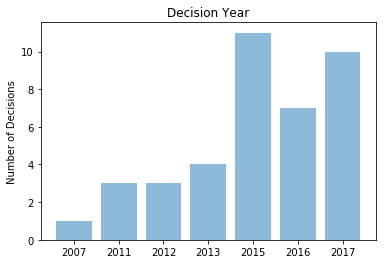

In [185]:
# Basic visualization of decision years
import numpy as np
import matplotlib.pyplot as plt

# sorting for X axis
year_count = sorted(year_count.items())

years = [x for x, y in year_count]
y_pos = np.arange(len(years))
counts = [y for x, y in year_count]
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Number of Decisions')
plt.title('Decision Year')
 
plt.show()